In [151]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [140]:
import logging
logging.getLogger('tensorflow').disabled = True

In [141]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = {word_index[k]:k for k in word_index}

In [20]:
x = train_data[0]
x = " ".join([reverse_word_index.get(a-3,"?") for a in x])

In [21]:
x

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [142]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

In [143]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [144]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [145]:
x_train.shape

(25000, 10000)

In [152]:
model = Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16,activation="tanh",kernel_regularizer=regularizers.l2(0.001),))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [153]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [154]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [155]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2224 - acc: 0.7471 - val_loss: 0.1671 - val_acc: 0.8490
Epoch 2/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.1526 - acc: 0.8714 - val_loss: 0.1313 - val_acc: 0.8831
Epoch 3/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.1253 - acc: 0.8998 - val_loss: 0.1249 - val_acc: 0.8807
Epoch 4/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.1096 - acc: 0.9176 - val_loss: 0.1196 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1022 - acc: 0.9220 - val_loss: 0.1174 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.0961 - acc: 0.9271 - val_loss: 0.1197 - val_acc: 0.8823
Epoch 7/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.0895 - acc: 0.9343 - val_loss: 0.

In [156]:
history_dict = history.history

In [126]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

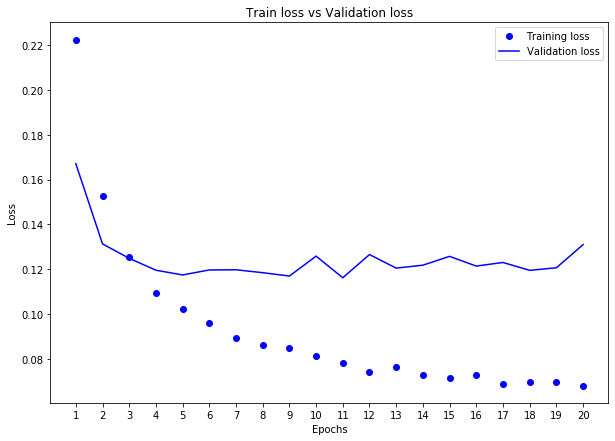

In [157]:
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1,len(history_dict["acc"])+1)
plt.figure(figsize=(10,7))
plt.title("Train loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs,train_loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
plt.legend()

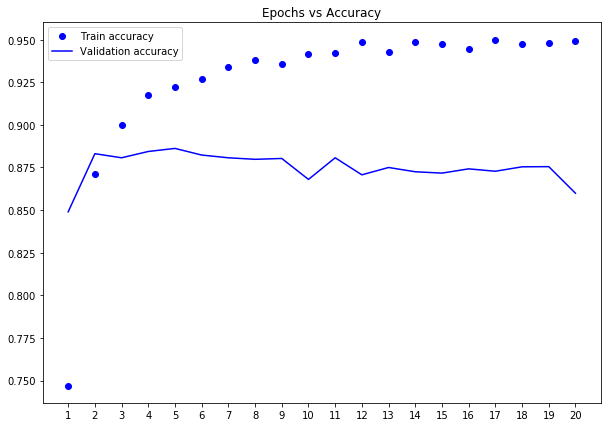

In [158]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
epochs = range(1,len(train_acc)+1)
plt.figure(figsize=(10,7))
plt.title("Epochs vs Accuracy")
plt.xticks(np.arange(min(epochs),max(epochs)+1,1))
plt.plot(epochs,train_acc,"bo",label="Train accuracy")
plt.plot(epochs,val_acc,"b",label="Validation accuracy")
plt.legend()

In [160]:
models = Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16,activation="tanh",kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [161]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [162]:
model.fit(x=x_train,
          y=y_train,
          epochs=5,
          batch_size=512)

Epoch 1/5
25000/25000 [==============================] - 1s 46us/sample - loss: 0.2885 - acc: 0.5052
Epoch 2/5
25000/25000 [==============================] - 1s 37us/sample - loss: 0.2728 - acc: 0.5012
Epoch 3/5
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2216 - acc: 0.7710
Epoch 4/5
25000/25000 [==============================] - 1s 36us/sample - loss: 0.1531 - acc: 0.8748
Epoch 5/5
25000/25000 [==============================] - 1s 28us/sample - loss: 0.1241 - acc: 0.9010


In [163]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 45us/sample - loss: 0.1246 - acc: 0.8862


In [164]:
results

[0.12455889783620834, 0.88624]

In [165]:
max(model.predict(x_test))

array([0.9763054], dtype=float32)

In [138]:
tf.__version__

'1.14.0'

In [137]:
import tensorflow as tf